In [3]:
## importing Standard Library Functions 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
## Loading Data Set 
df = pd.read_csv('D:\\OneDrive\\Desktop\\customer-segmentation-dataset\\Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.isnull().sum() # checking null points 

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
df.drop(columns=['CustomerID'],inplace=True) # deleting CustomerId Column 
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [7]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


# Gender Distribution

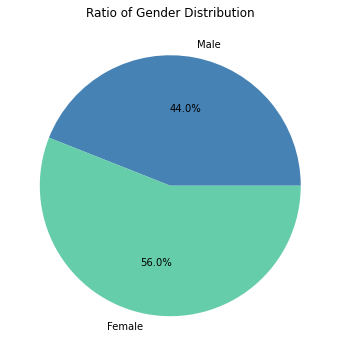

In [8]:
labels=df['Gender'].unique()
values=df['Gender'].value_counts(ascending=True)
fig, axes = plt.subplots(1,1, figsize=(15,6))
axes.pie(values,labels=labels,autopct='%1.1f%%',colors=['steelblue','mediumaquamarine'])
axes.set(title='Ratio of Gender Distribution')
plt.show()

* Female Customers are 6% more compared to Male customers.

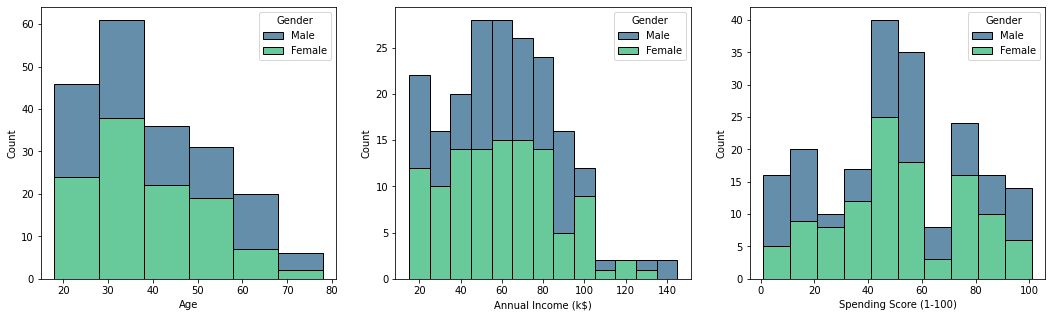

In [9]:
_, (ax0, ax1,ax2) = plt.subplots(1,3, figsize=(18, 5))

sns.histplot(data=df, x='Age', hue='Gender', binwidth=10, multiple='stack', ax=ax0, palette='viridis')
sns.histplot(data=df, x='Annual Income (k$)', hue='Gender', binwidth=10, multiple='stack', ax=ax1,palette='viridis');
sns.histplot(data=df, x='Spending Score (1-100)', hue='Gender', binwidth=10, multiple='stack', palette='viridis',ax=ax2);

#### Age
* Female dominate in 20-50 (years old) age group

#### Annual Income 
* Most of the customers earn 55k-80k annual income (Female dominate)

#### Spending Score
* Male Dominate in spending score 0-20 and female dominate in spending score 20-100
* Most Female customers have spendingscore between 40 and 60 .
* Women tend to spend more than men

# Visually analyzing age, spendingscore and annual income

In [10]:
# Defining custom ranges for Age , SpendingScore Annual Income.

bins=[18,25,35,45,55,70]
labels=['18-25','26-35','36-45','46-55','56-above']
df['AgeRange'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

bins=[0,30,60,90,120,150]
labels = ['0-30','30-60','60-90','90-120','120above']
df['AnualIncomeRange'] = pd.cut(df['Annual Income (k$)'],bins=bins , labels=labels , right=False)

bins=[0,20,40,60,80,100]
labels = ['0-20','20-40','40-60','60-80','80above']
df['SpendingScoreRange'] = pd.cut(df['Spending Score (1-100)'],bins=bins , labels=labels , right=False)




### UNIVARIATE ANALYSIS

<AxesSubplot:xlabel='SpendingScoreRange', ylabel='count'>

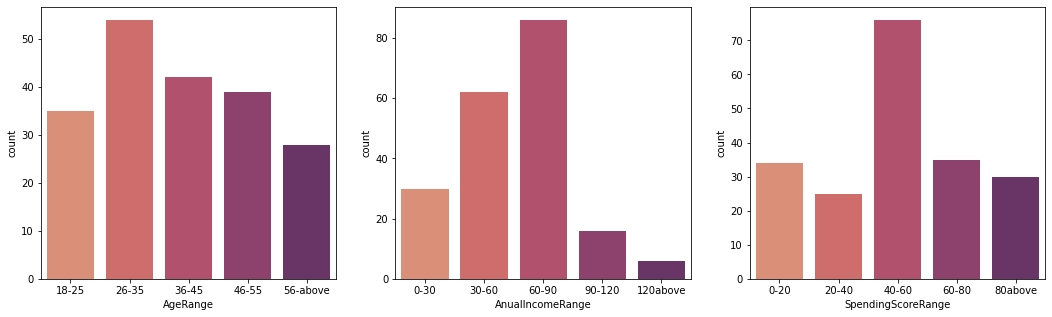

In [11]:
# plotting Age, Annual Income and SpendingScore
_, (ax0, ax1,ax2) = plt.subplots(1,3, figsize=(18, 5))
sns.countplot(x='AgeRange',hue=None,data=df,palette="flare",ax=ax0)
sns.countplot(x ='AnualIncomeRange',hue=None,data=df,palette='flare',ax=ax1)
sns.countplot(x ='SpendingScoreRange',hue=None,data=df,palette='flare', ax = ax2)

### Insights 
* Most customers have the age range of 26-35 years
* Most customers have an Annual income range of 60-90 $k 
* Most customers have a spending score range of 40-60


### BIVARIATE ANALYSIS

<function matplotlib.pyplot.show(close=None, block=None)>

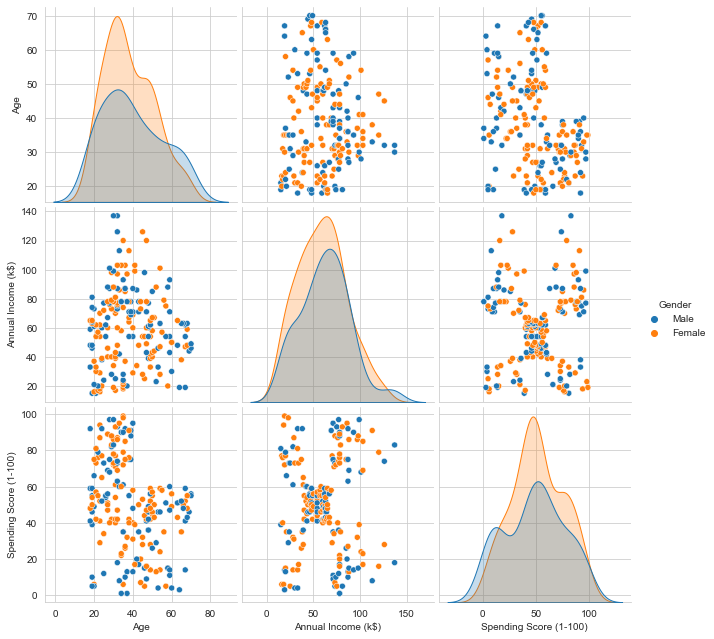

In [12]:
sns.set_style('whitegrid')
sns.pairplot(df,hue="Gender",height=3)
plt.show

#### Insights
* Age, Income and Spending Score features are multimodal distributions
* Annual Income vs Spending Score form dense regions in the plot

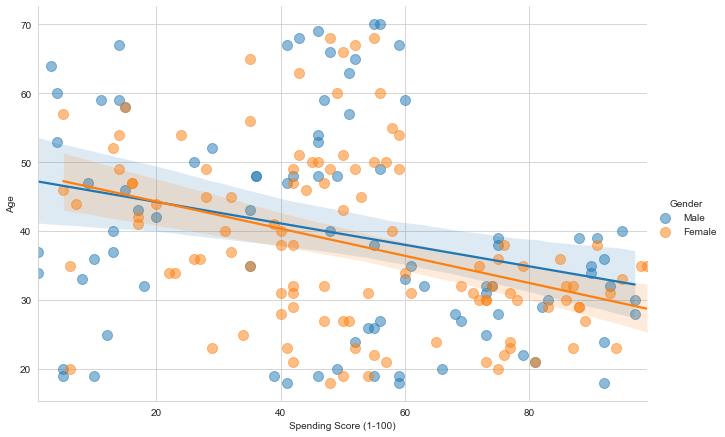

In [13]:
sns.lmplot(data=df,x='Spending Score (1-100)', y='Age', hue='Gender',aspect=1.5,height=6,scatter_kws={'s': 100, 'alpha': 0.5});

* There is a linear dependency between Spending Score and Age.
* Younger customers tend to have higher spending score and spending score decreases when age goes up.

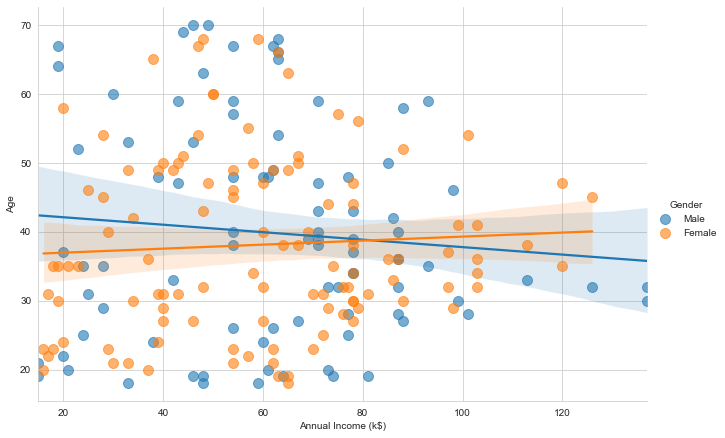

In [14]:
sns.lmplot(data=df,x='Annual Income (k$)', y='Age', hue='Gender',aspect=1.5,height=6,scatter_kws={'s': 100, 'alpha': 0.6});

* we couldn't find much relationship between Annual income and Age

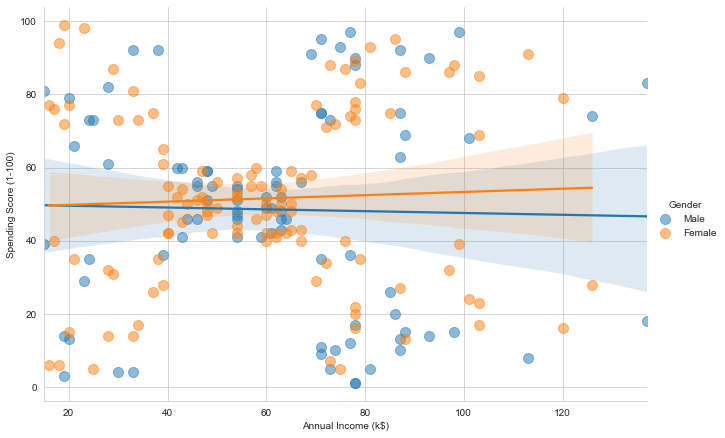

In [15]:
sns.lmplot(data=df,x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender',aspect=1.5,height=6,scatter_kws={'s': 100, 'alpha': 0.5});

### insights
* Customers having mid-range of spendingscore and annual income are highly related 
* we can visually Recognize five clusters formed between Spending score and Annual Income

##### spendingscore and annual income are our main feautures for performing clustering on Mall Customers

# K means Clustering

#### Elbow method

<function matplotlib.pyplot.show(close=None, block=None)>

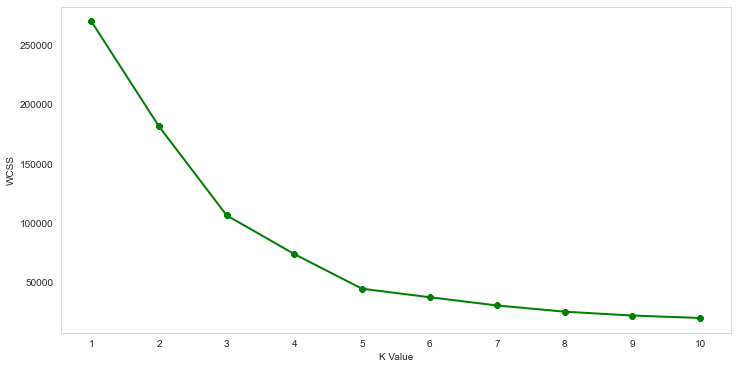

In [16]:
from sklearn.cluster import KMeans
X=df.iloc[:, [2,3]].values
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="green", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show

In [17]:
kmeansmodel = KMeans(n_clusters=5, init="k-means++",random_state=0)
y_kmeans = kmeansmodel.fit_predict(df.iloc[:,[2,3]].values)
y_kmeans

array([3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 0,
       3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 4, 2, 0, 2, 4, 2, 4, 2,
       0, 2, 4, 2, 4, 2, 4, 2, 4, 2, 0, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2])

#### KMEANS Applied

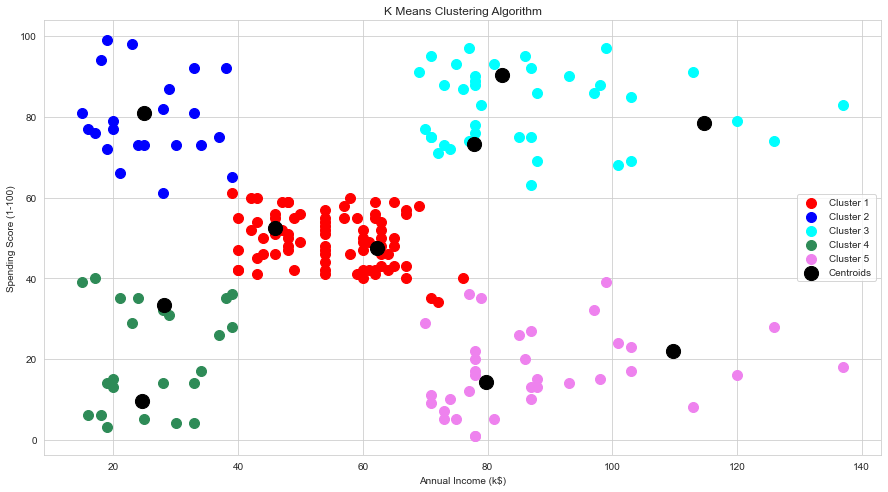

In [22]:
plt.figure(1 , figsize = (15 , 8))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1') ### Cluster 1
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')  ## Cluster 2
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'cyan', label = 'Cluster 3')  ## Cluster 3
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'seagreen', label = 'Cluster 4')  ## Cluster 4
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'violet', label = 'Cluster 5')   ## Cluster 5
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'black', label = 'Centroids')
plt.title('K Means Clustering Algorithm')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

### insights 
* Here we have performed Kmeans clustering between Annual Income and Spending Score. 
* There are 5 differente groups, each group having specific characteristics.
* There are costumers with high, medium and low annual income and with high, medium and low spending score. For each one, the administrators could plan different actions.

### Clusters
* CLUSTER 1 - Medium Income(40-70 k)  and  Medium SpendingScore(40-60)
* CLUSTER 2 - Low Income(20-40 k)  and  High SpendingScore(60-100)
* CLUSTER 3 - High Income(70-140 k)  and  High SpendingScore(60-100)
* CLUSTER 4 - Low Income(20-40 k)  and  Low SpendingScore(0-40)
* CLUSTER 5 - High Income(70-140 k)  and  Low SpendingScore(0-40)

###### Most of the customers belong to CLUSTER 1 having medium Annual Income and medium SpendingScore